# DKRZ Python visualization

## Combine multiple plots in one figure

----

```
Copyright 2022 Deutsches Klimarechenzentrum GmbH (DKRZ)
Licensed under CC-BY-NC-SA-4.0
```

----

This tutorial demonstrates how to draw multiple plots in one figure. The base is a regular grid where each plot can be placed in one or across multiple grid cells.

**Content**

- Create multiple plots on different axes
- Add more space between plots
- Use fig.tight_layout
- Use plt.subplots_adjust()
- Use constrained layout
- Arrange plots in figure
  - Gridspec  I - Gridspec.gridspec
  - Gridspec II - Figure.add_gridspec

See also https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html

<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Create multiple plots on different axes

Generate a simple 1D-array of increasing values.

In [3]:
x = np.arange(0,10)

Create the 4 plots.

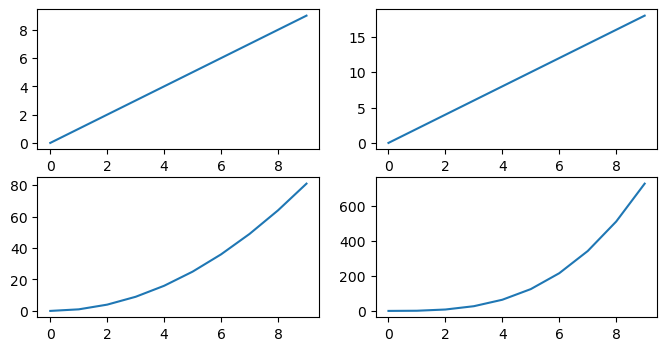

In [4]:
fig = plt.figure(figsize=(8,4))

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.plot(x, x)
ax2.plot(x, x*2)
ax3.plot(x, x**2)
ax4.plot(x, x**3)

That looks good but when we turn on the labels to all axes they will overlap.

Create a figure containing 2 rows with 2 columns of same size like above. Turn on axes labels for each plot with the `tick_params` method.

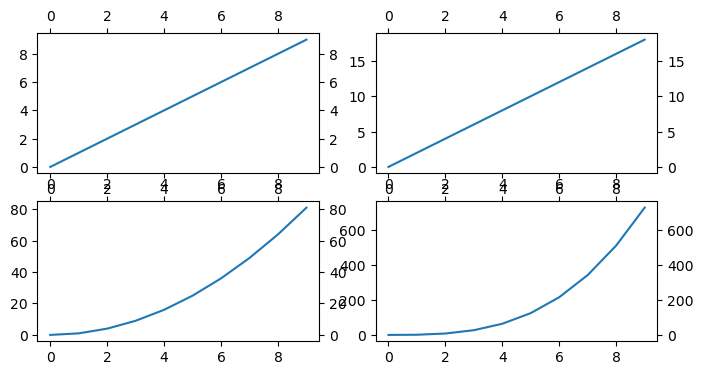

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,4))

axs[0,0].tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)
axs[0,1].tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)
axs[1,0].tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)
axs[1,1].tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)

axs[0, 0].plot(x, x)
axs[0, 1].plot(x, x*2)
axs[1, 0].plot(x, x**2)
axs[1, 1].plot(x, x**3)

As you can see the right/left labels in the middle are overlapping. To prevent this behavior Matplotlib has a figure method `fig.tight_layout()` that will do this for us.


But first, we write a short function to do some repeating things for us.

In [6]:
def example_plots():
    axs[0,0].tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)
    axs[0,1].tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)
    axs[1,0].tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)
    axs[1,1].tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)
    
    axs[0, 0].plot(x, x)
    axs[0, 1].plot(x, x*2)
    axs[1, 0].plot(x, x**2)
    axs[1, 1].plot(x, x**3)

## Add more space between plots

Use tight_layout() default and create the figure again.

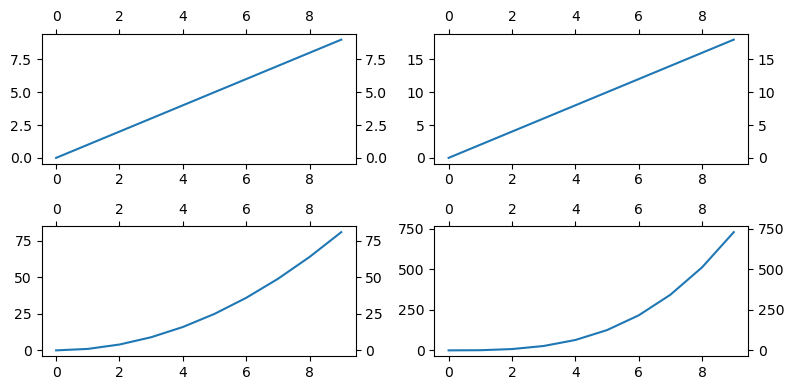

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,4))

example_plots()

fig.tight_layout()

That is much better, no overlapping anymore. But, if we want to add more white space between the plot columns we have to commit some parameters to tight_layout.

### Use tight_layout(pad=xx)

The `pad` adds space between the plots (in fraction of the font size), but this can lead to smaller plot in the figure.


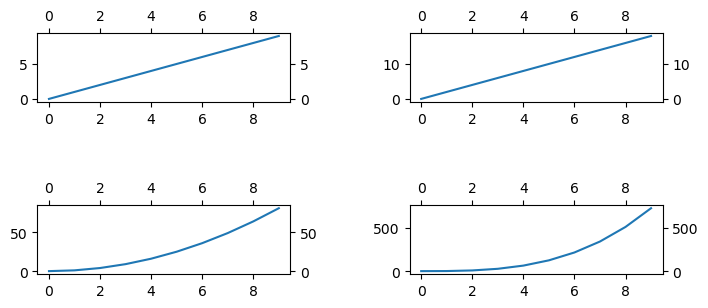

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,4))

example_plots()

fig.tight_layout(pad=4)

Hm, better but it has changed the axes labeling of the plot. 

Let's try another approach - the `plt.subplots_adjust()` method.

### Use plt.subplots_adjust()

With the parameter _wspace_ and _hspace_ of plt.subplots_adjust() you can controll the horizontal (width) and the vertical (height) space between the plots. With the other parameters _left_, _right_, _top_, and _bottom_ you can set the position of the subplots.


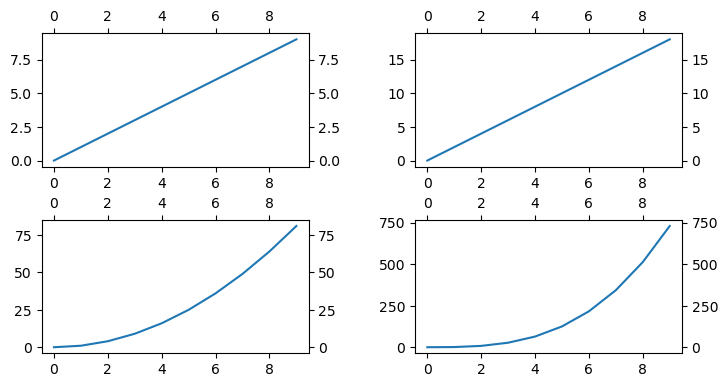

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,4))

example_plots()

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

### Use constrained layout

This is also an approach to let Matplotlib automatically set the position and space between the plots as best as possible to fit the figure size.

https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html

In the `plt.subplots` call you can use one of the following parameter settings:

    constrained_layout=True
    layout='constrained'

<br>


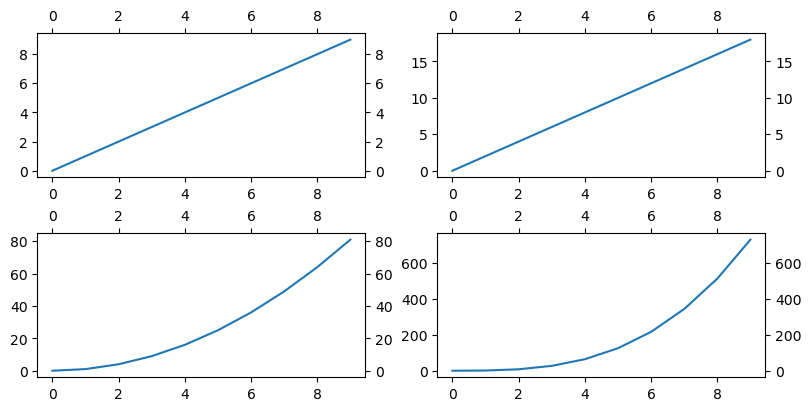

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, 
                        figsize=(8,4),
                        layout='constrained')

example_plots()

## Arrange plots in figure

The next example shows how to use Gridspec to arrange plots of different size across multiple rows and columns.

Gridspec: https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html

### Gridspec I

In [11]:
import matplotlib.gridspec as gridspec

Ok, let's see how this works. We want to create a figure with three plots in 2 rows and over 3 columns. The upper row contains a single plot across all columns, the second (lower) row contains two plots in which the first plot is in column 1 and the second plot across column 2 and 3.


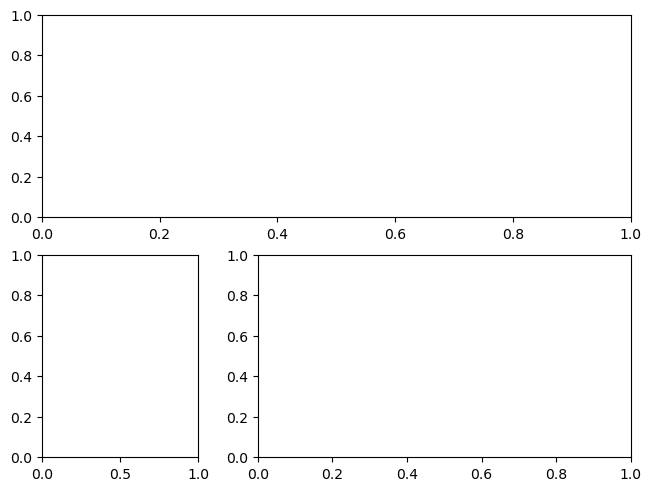

In [12]:
fig = plt.figure(constrained_layout=True)

gs = gridspec.GridSpec(2, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1:3])

There are actually no limits to the arrangement of multiple plots.

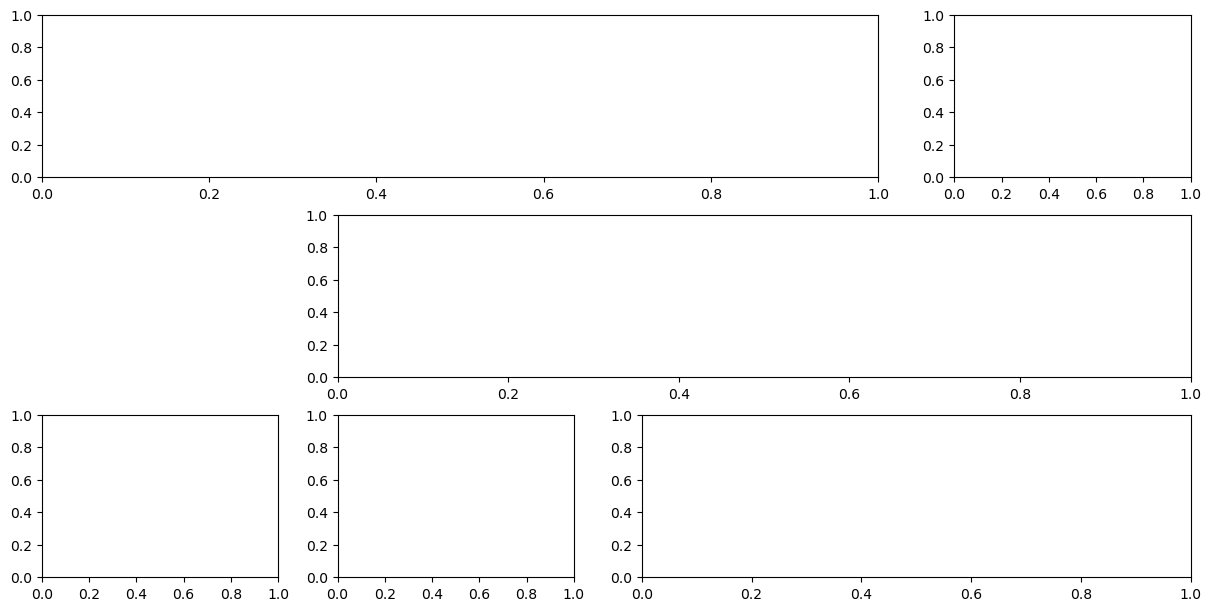

In [13]:
fig = plt.figure(figsize=(12,6), constrained_layout=True)

gs = gridspec.GridSpec(3, 4, figure=fig)

ax1 = fig.add_subplot(gs[0, 0:3])
ax2 = fig.add_subplot(gs[0, 3:4])
ax3 = fig.add_subplot(gs[1, 1:4])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[2, 2:4])

A big plus is the ability to nest one gridspec inside another. Therefore, we have to define a main gridspec that contains sub-gridspecs.

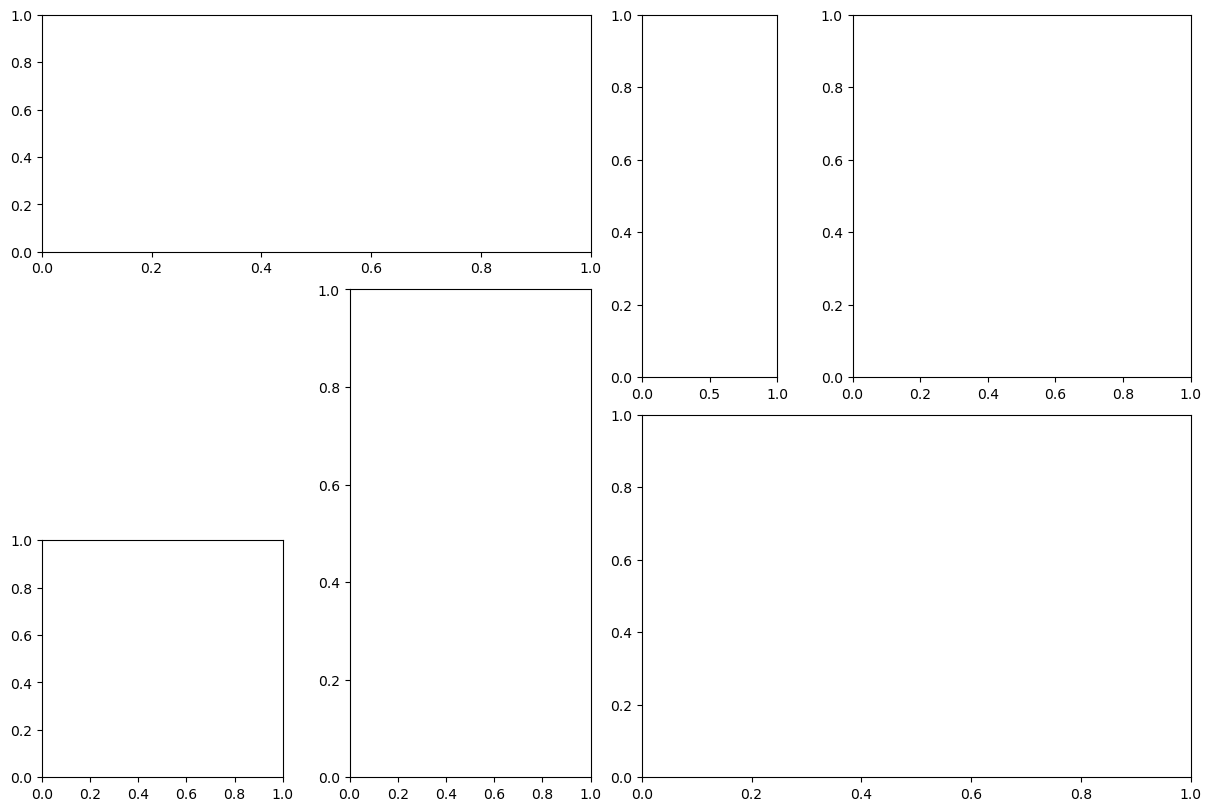

In [14]:
fig = plt.figure(figsize=(12,8), constrained_layout=True)

gs0 = gridspec.GridSpec(1, 2, figure=fig)   # main gridspec

gs00 = gs0[0].subgridspec(3, 2)

ax1 = fig.add_subplot(gs00[0, :])
ax2 = fig.add_subplot(gs00[2, 0])
ax3 = fig.add_subplot(gs00[1:3, 1])

gs01 = gs0[1].subgridspec(2, 3)

ax4 = fig.add_subplot(gs01[0, 0])
ax5 = fig.add_subplot(gs01[0, 1:3])
ax6 = fig.add_subplot(gs01[1, :])

### Gridspec II

It is not needed to import `Gridspec.gridspec` due to the fact that matplotlib has a `Figure.add_gridspec` method.


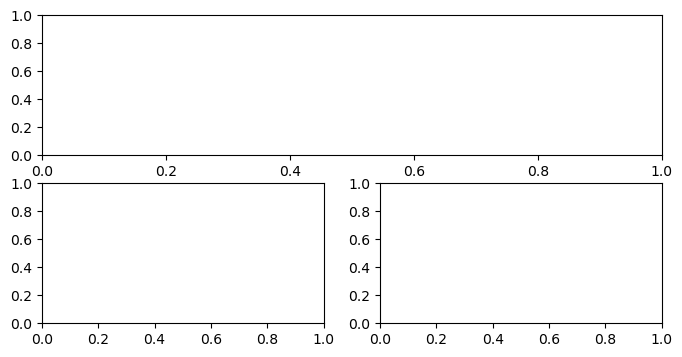

In [15]:
fig = plt.figure(figsize=(8,4))

gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1:3])

## Use case

Now we use some random data to create the three plots and use the gridspec from above.


In [16]:
x = np.arange(10)
y1 = np.random.uniform(low=0., high=1., size=10)
y2 = np.random.uniform(low=0., high=10., size=10)
y3 = np.random.uniform(low=1., high=2., size=10)

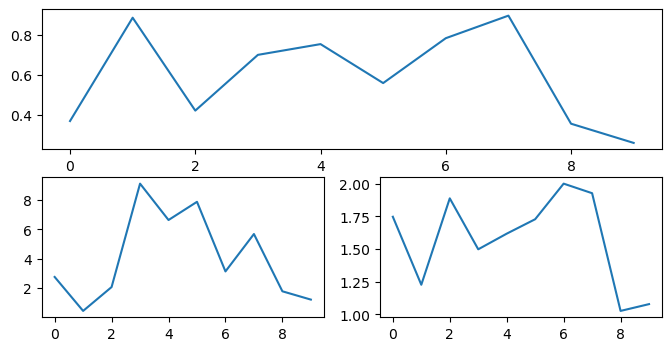

In [17]:
fig = plt.figure(figsize=(8, 4))

gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1:3])

plot1 = ax1.plot(x, y1)
plot2 = ax2.plot(x, y2)
plot3 = ax3.plot(x, y3)